In [1]:
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.linear_model import LinearRegression

In [2]:
import seaborn as sb

In [3]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Gathering, Processing and Cleaning the data

In [34]:
wine = pd.read_csv('Wine_dataset.csv')

In [35]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [36]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [37]:
wine.pop('Id')

0          0
1          1
2          2
3          3
4          4
        ... 
1138    1592
1139    1593
1140    1594
1141    1595
1142    1597
Name: Id, Length: 1143, dtype: int64

In [38]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [39]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [40]:
y = wine['quality']
x = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol']]

# Plotting

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

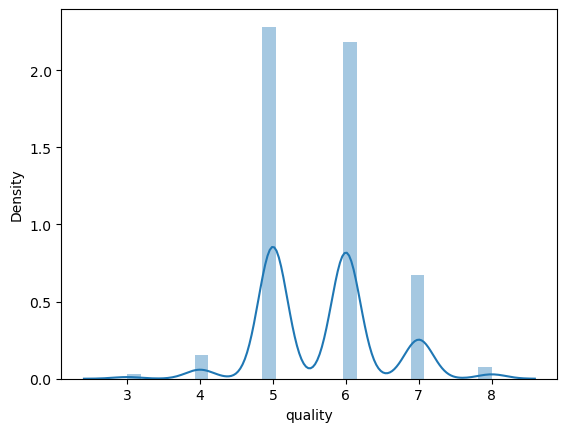

In [41]:
sb.distplot(wine['quality'])

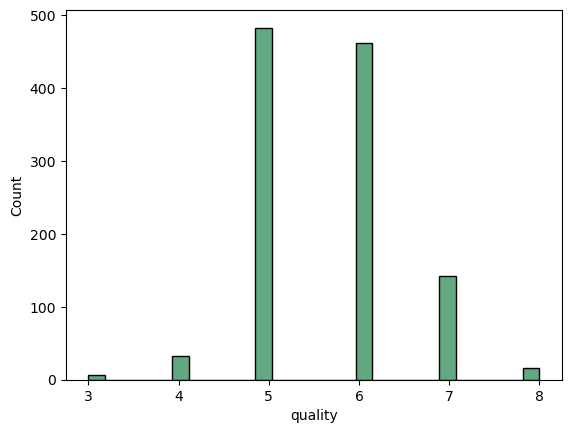

In [42]:
sb.histplot(wine['quality'], color = 'seagreen')
pt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


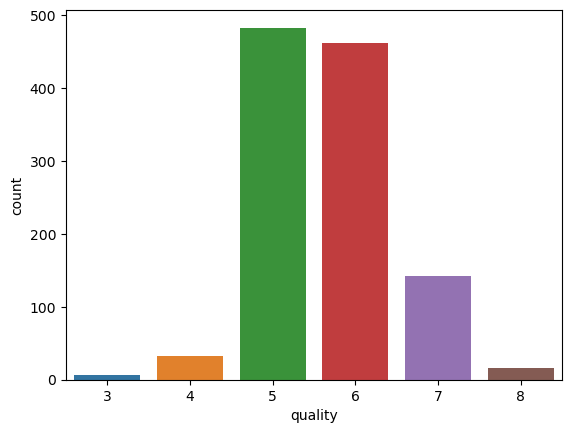

In [43]:
sb.countplot(wine['quality'])
pt.show()

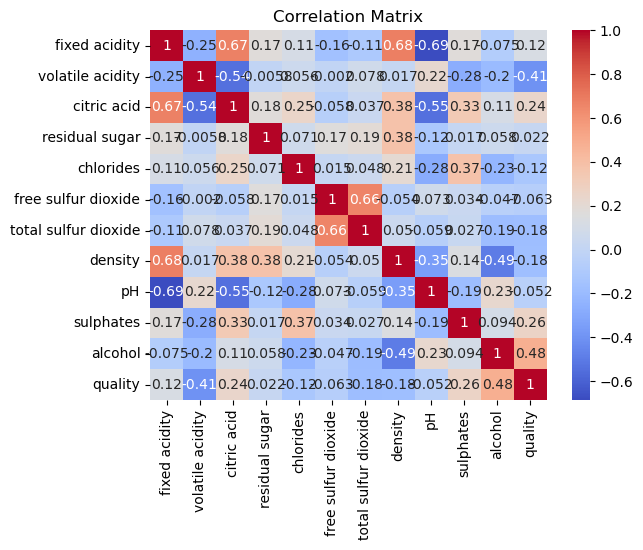

In [44]:
co_matrix = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol','quality']].corr()
sb.heatmap(co_matrix, annot = True, cmap = 'coolwarm')
pt.title('Correlation Matrix')
pt.show()

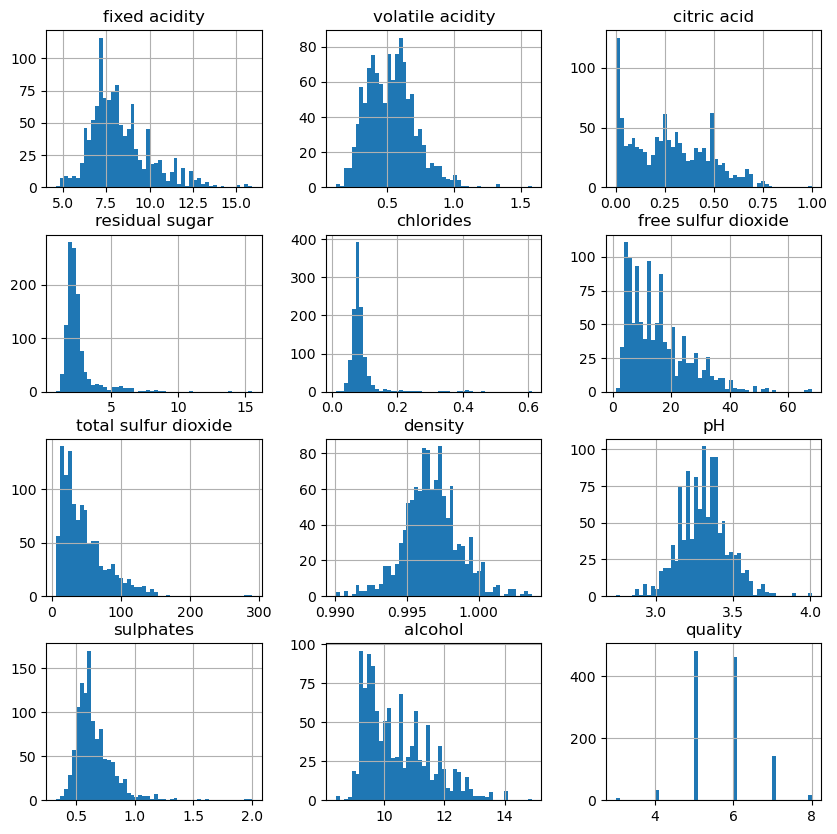

In [45]:
wine.hist(figsize=(10,10),bins=50)
pt.show()

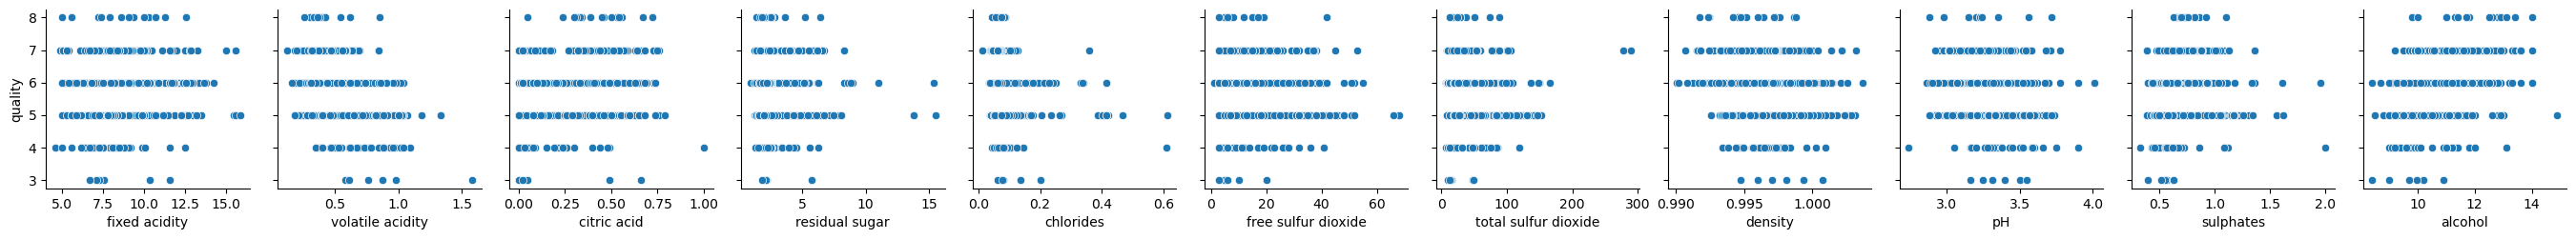

In [46]:
sb.pairplot(wine, x_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density',
       'pH', 'sulphates', 'alcohol'], y_vars = 'quality', kind = 'scatter')
pt.show()

<AxesSubplot:>

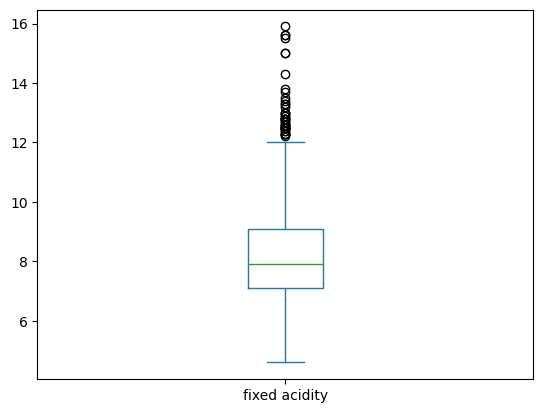

In [47]:
wine['fixed acidity'].plot(kind = 'box')

fixed acidity              AxesSubplot(0.125,0.712609;0.168478x0.167391)
volatile acidity        AxesSubplot(0.327174,0.712609;0.168478x0.167391)
citric acid             AxesSubplot(0.529348,0.712609;0.168478x0.167391)
residual sugar          AxesSubplot(0.731522,0.712609;0.168478x0.167391)
chlorides                  AxesSubplot(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     AxesSubplot(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    AxesSubplot(0.529348,0.511739;0.168478x0.167391)
density                 AxesSubplot(0.731522,0.511739;0.168478x0.167391)
pH                          AxesSubplot(0.125,0.31087;0.168478x0.167391)
sulphates                AxesSubplot(0.327174,0.31087;0.168478x0.167391)
alcohol                  AxesSubplot(0.529348,0.31087;0.168478x0.167391)
quality                  AxesSubplot(0.731522,0.31087;0.168478x0.167391)
dtype: object

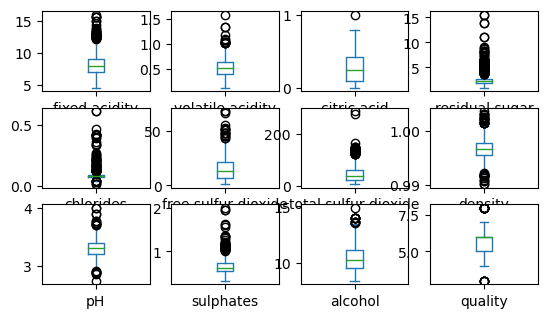

In [48]:
wine.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False)

# Training and Testing

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2) 

In [51]:
winelr = LinearRegression()

In [52]:
winelr.fit(xtrain, ytrain)

LinearRegression()

In [53]:
winelr.coef_

array([-0.01583539, -0.99778153,  0.02435348,  0.00728783, -2.26979887,
        0.00473855, -0.00396143,  2.80674713, -0.62213609,  0.95261497,
        0.282034  ])

In [54]:
pd.DataFrame(winelr.coef_,index=x.columns,columns=['mycoef'])

,mycoef
fixed acidity,-0.015835
volatile acidity,-0.997782
citric acid,0.024353
residual sugar,0.007288
chlorides,-2.269799
free sulfur dioxide,0.004739
total sulfur dioxide,-0.003961
density,2.806747
pH,-0.622136
sulphates,0.952615


In [55]:
pr = winelr.predict(xtest)

# Metrics

In [56]:
r2_score(ytest, pr)

0.40467614047423506

In [57]:
mean_absolute_error(ytest,pr)

0.4764977449513028

In [58]:
mean_squared_error(ytest, pr)

0.37457916647112266

In [59]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

# Prediction

In [62]:
winelr.predict([[8, 0.6, 0.15, 1.9, 0.07, 22.0, 35.0, 0.92, 3.5, 0.65, 10.2]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.28286522])